In [1]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from scipy import stats
from scipy.stats import norm


In [4]:
# Read the data file
df = pd.read_csv("Advertising_Adj.csv")

# Get the predictor and response variables
x = df.tv.values
y = df.sales.values

In [5]:
df.head()

,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [6]:
model = LinearRegression()

model.fit(df[['tv']], df['sales'])

LinearRegression()

In [7]:
model.coef_, model.intercept_

(array([1.00077387]), 148.0542586883501)

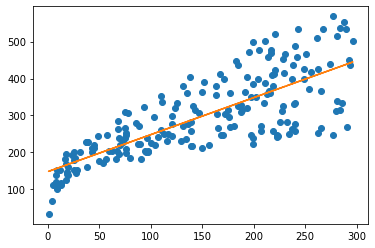

In [8]:
plt.plot(x,y,'o')
plt.plot(x,model.predict(df[['tv']]))

In [87]:
# List to store the accepted beta values in a list 
beta0_list = []
beta1_list = []

In [100]:
# Initial beta values
beta0=np.random.normal(loc=1,scale=1)
beta1=np.random.normal(loc=1,scale=1)

In [101]:
# Function to get the prior given the beta0 and beta1 values
def get_prior(beta0,beta1):
  prior_b0 = np.log(norm.pdf(beta0,1, 1))
  prior_b1 = np.log(norm.pdf(beta1,1200))
  prior = np.sum(prior_b0+prior_b1)
  
  return prior

In [102]:
# Compute the likelihood for the initial beta values
likelihood = np.sum([-1*np.log(((y[j] - ((beta0*x[j]) + beta1))**2)) for j in range(len(x))])

# Get the prior of the intial beta values
prior = get_prior(beta0,beta1)

# Compute the posterior of the initial beta values
posterior = likelihood + prior


In [103]:
# Save the initial posterior value as prev_posterior for comparision later
prev_posterior = posterior
# Append the initial beta values to the list
beta0_list.append(beta0)
beta1_list.append(beta1)

In [104]:
# Number of sampling epochs
epochs = 250000

for i in range(epochs):

  # Get the new proposed beta values
  beta0 = np.random.normal(loc=beta0_list[-1],scale=0.5)
  beta1 = np.random.normal(loc=beta1_list[-1],scale=0.1)

  # Get the prior values for the proposed beta values
  prior = get_prior(beta0,beta1)


  # Compute P(data|w) i.e. the log-likelihood for all the data points
  likelihood = np.sum([-1*np.log(((y[j] - ((beta0*x[j]) + beta1))**2)) for j in range(len(x))])

  # To compute the posterior given the likelihood and prior
  posterior = likelihood + prior

  # Just the exponential of the ratio (Not the probability)
  prob = np.exp(posterior - prev_posterior)

  # If the prob is greater than 1 then the new proabability is larger than the old probability
  # Accept the values in this case
  if prob>1:

    # Append the beta0 and beta1 list values
    beta0_list.append(beta0)
    beta1_list.append(beta1)

    # Save the accepted posterior as the previous posterior
    prev_posterior = posterior

  else:
    coin = np.random.uniform(0, 1)

    # Accept the values in this case
    if coin>0.9:
      beta0_list.append(beta0)
      beta1_list.append(beta1)
      prev_posterior = posterior



In [105]:
# The number of data points to consider after the beta list has been populated
# The initial values of the lists will be random and hence can be removed
burn_rate = int(len(beta0_list)*0.3)

(array([9.0000e+00, 4.7000e+01, 7.0600e+02, 7.9080e+03, 4.8203e+04,
        2.7911e+04, 6.2660e+03, 6.0400e+02, 3.2000e+01, 3.0000e+00]),
 array([-2.74914155, -1.9419034 , -1.13466525, -0.3274271 ,  0.47981105,
         1.2870492 ,  2.09428736,  2.90152551,  3.70876366,  4.51600181,
         5.32323996]),
 <a list of 10 Patch objects>)

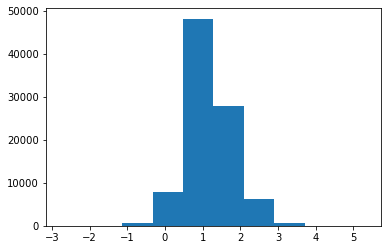

In [106]:
plt.hist(beta0_list[:-burn_rate])

(array([14399., 10666.,  1529.,     0.,     0.,     0.,     0.,     0.,
        33152., 31943.]),
 array([ -3.18063674,  14.64408929,  32.46881533,  50.29354136,
         68.11826739,  85.94299343, 103.76771946, 121.5924455 ,
        139.41717153, 157.24189756, 175.0666236 ]),
 <a list of 10 Patch objects>)

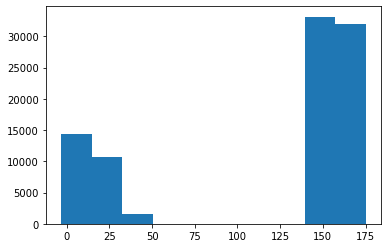

In [107]:
plt.hist(beta1_list[:-burn_rate])

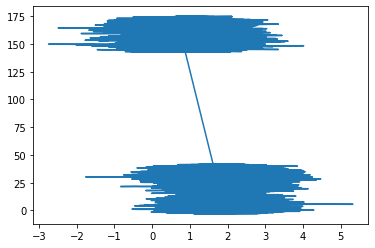

In [108]:
plt.plot(beta0_list,beta1_list)